In [1]:
# import the necessary libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind, f_oneway
from scipy.stats import chisquare, chi2_contingency

In [2]:
# Read the data as a data frame

insurance_data = pd.read_csv("insurance.csv") 

In [3]:
# Shape of the data (number of rows and columns)

insurance_data.shape

(1338, 7)

In [12]:
# data type of each attribute, use info() function

insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [14]:
# Checking the presence of missing values, use isnull() function

insurance_data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [5]:
# 5 point summary of numerical attributes, use describe() function

insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


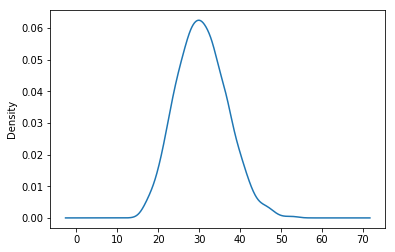

In [28]:
# Distribution of ‘bmi’ column

insurance_data.bmi.plot(kind='kde')

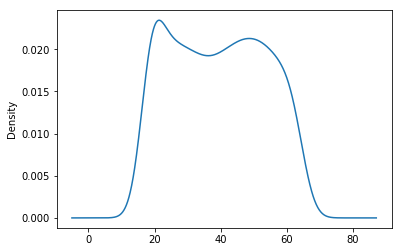

In [29]:
# Distribution of 'age' column

insurance_data.age.plot(kind='kde')

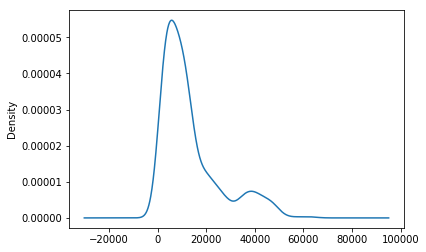

In [30]:
# Distribution of 'charges' column

insurance_data.charges.plot(kind='kde')

In [45]:
# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns, use skew() function

insurance_data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

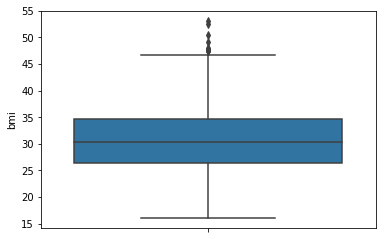

In [38]:
# Checking the presence of outliers in ‘bmi’ column

sns.boxplot(y='bmi', data=insurance_data)

# Result: Outliers are present as seen as above in the bmi column

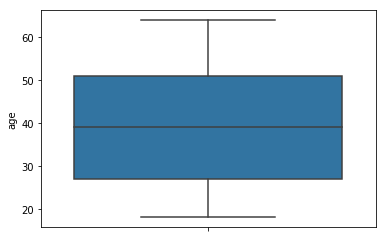

In [39]:
# Checking the presence of outliers in ‘age’ column

sns.boxplot(y='age', data=insurance_data)

# Result: No outliers are present in the age column as seen above

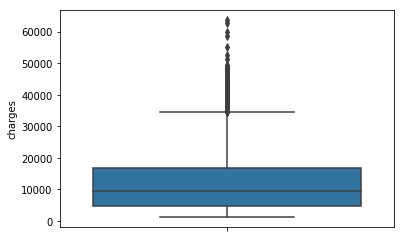

In [40]:
# Checking the presence of outliers in ‘charges’ column

sns.boxplot(y='charges', data=insurance_data)

# Result: Outliers are present as seen above in the charges column

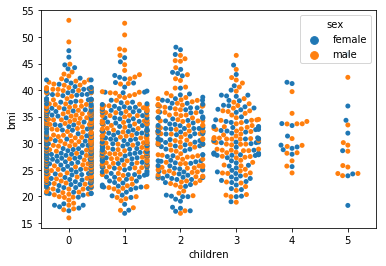

In [10]:
# Distribution of categorical column, for e.g.sex (include children)

sns.swarmplot(x='children', y='bmi', hue='sex', data=insurance_data)

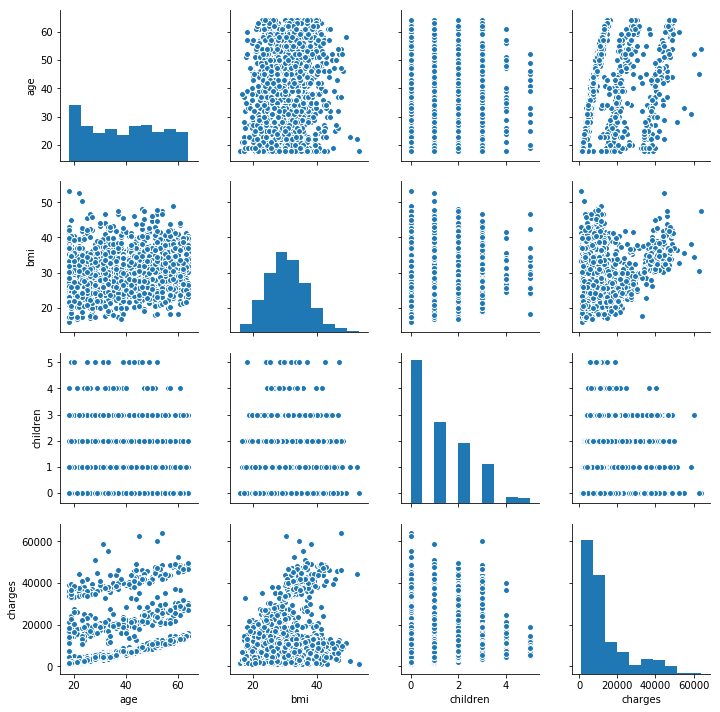

In [16]:
# Pair plot that includes all the columns of the data frame (age, bmi, children and charges columns)

sns.pairplot(insurance_data)

# Do charges of people who smoke differ significantly from the people who
# don't?

In [15]:
# H0 - Charges of people who smoke do not differ significantly from the people who don't
# Ha - Charges of people who smoke differs significantly from the people who don't

# Extract the charges data for smokers and non-smokers in two separate series

charges_smokers = insurance_data[insurance_data['smoker'] == "yes"]['charges']
charges_non_smokers = insurance_data[insurance_data['smoker'] == "no"]['charges']

# Apply the two sample independent t_test to check the pvalue

stats.ttest_ind(charges_smokers, charges_non_smokers)

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

# Result: Since the p_value of 8.271435842177219e-283 is less than 0.05, we reject Null Hypothesis in favour of alternate hypothesis, i.e. Charges of people who smoke differs significantly from the people who don't.

# Does bmi of males differ significantly from that of females

In [20]:
# H0 - bmi of males does not differ significantly from that of females
# Ha - bmi of males differs significantly from that of females

# Extract the bmi data for males and females in two separate series

bmi_males = insurance_data[insurance_data['sex'] == "male"]['bmi']
bmi_females = insurance_data[insurance_data['sex'] == "female"]['bmi']

# Apply the two sample independent t_test to check the pvalue

stats.ttest_ind(bmi_males, bmi_females)

Ttest_indResult(statistic=1.696752635752224, pvalue=0.08997637178984932)

# Result: Since the p_value of 0.08997637178984932 is greater than 0.05, there is not enough evidence to reject null hypothesis, i.e. bmi of males does not differ significantly from that of females.

# Is the proportion of smokers significantly different in different genders?

In [25]:
# Find the cross-tab of gender and smoker columns in the insurance dataset

cont_crosstab = pd.crosstab(insurance_data['sex'], insurance_data['smoker'])
cont_crosstab

smoker,no,yes
sex,,
female,547,115
male,517,159


In [26]:
# H0 - Proportion of smokers is same in different genders
# Ha - Proportion of smokers is significantly different in different genders

# Apply the chi2_contingency test on the above cross tab

chi2_contingency(cont_crosstab)

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

# Result: Since the p_value of 0.006548143503580696 is less than 0.05, we reject Null Hypothesis in favour of alternate hypothesis, i.e. proportion of smokers is significantly different in different genders

# Is the distribution of bmi across women with no children, one child and two
# children, the same ?

In [11]:
# H0 - Distribution of bmi of women with no children, one child and two children are the same
# Ha - Distribution of bmi of women with no children, one child and two children are not the same

# Extract the bmi data for women with no children, one child and two children in separate series

bmi_women_no_children = insurance_data[(insurance_data['children'] == 0) & (insurance_data['sex'] == "female")]['bmi']
bmi_women_one_child = insurance_data[(insurance_data['children'] == 1) & (insurance_data['sex'] == "female")]['bmi']
bmi_women_two_children = insurance_data[(insurance_data['children'] == 2) & (insurance_data['sex'] == "female")]['bmi']

# Apply the one way ANOVA test to check the pvalue

f_oneway(bmi_women_no_children, bmi_women_one_child, bmi_women_two_children)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

# Result: Since the p_value of 0.7158579926754841 is greater than 0.05, there is not enough evidence to reject null hypothesis, i.e. Distribution of bmi of women with no children, one child and two children are the same